<a href="https://colab.research.google.com/github/crowell97/ES2245/blob/main/es2245_lecture6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Propagation of Uncertainties in Earth Science

## Introduction
In Earth Science, measurements are rarely exact. Whether measuring the mass of a rock, the width of a river, or the distance to a magnetic anomaly, every value has an associated **uncertainty** (or error). When we use these measured values in calculations, their uncertainties "propagate" to the final result.

This notebook demonstrates how to calculate these propagated uncertainties using Python and visualizes the results.

### The Basic Rules

**1. Addition and Subtraction ($z = x \pm y$):**
Errors add in **quadrature** (absolute uncertainties).
$$\delta z = \sqrt{(\delta x)^2 + (\delta y)^2}$$

**2. Multiplication and Division ($z = x \cdot y$ or $z = x / y$):**
**Fractional** (relative) errors add in quadrature.
$$\frac{\delta z}{|z|} = \sqrt{\left(\frac{\delta x}{x}\right)^2 + \left(\frac{\delta y}{y}\right)^2}$$

**3. Powers ($z = x^n$):**
The relative error is multiplied by the power $|n|$.
$$\frac{\delta z}{|z|} = |n| \frac{\delta x}{|x|}$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Set a clean plotting style
plt.style.use('seaborn-v0_8-whitegrid')

# A helper function to print results neatly
def print_result(name, value, uncertainty, unit):
    print(f"--- {name} ---")
    print(f"Value: {value:.4f} {unit}")
    print(f"Uncertainty: +/- {uncertainty:.4f} {unit}")
    print(f"Relative Uncertainty: {(uncertainty/value)*100:.2f}%")
    print("")

## Example 1: Mineral Density (Division Rule)
**Context:** Identifying an unknown mineral specimen.
**Formula:** $\rho = m / V$

Since this involves division, we propagate **relative uncertainties**.

* **Mass ($m$):** 240.5 $\pm$ 0.1 g
* **Volume ($V$):** 85.0 $\pm$ 2.0 cm$^3$

--- Mineral Density ---
Value: 2.8294 g/cm^3
Uncertainty: +/- 0.0666 g/cm^3
Relative Uncertainty: 2.35%



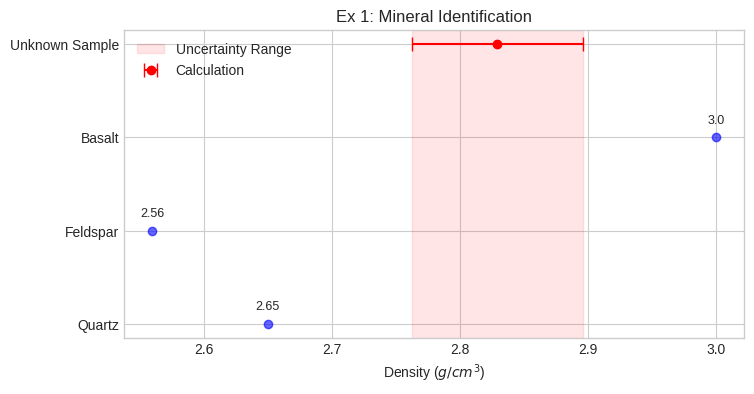

In [2]:
# --- Calculation ---
mass = 240.5      # grams
d_mass = 0.1      # uncertainty

volume = 85.0     # cm^3
d_volume = 2.0    # uncertainty

# 1. Calculate Value
rho = mass / volume

# 2. Propagate Uncertainty (Division Rule: Relative errors add in quadrature)
frac_u_rho = np.sqrt( (d_mass/mass)**2 + (d_volume/volume)**2 )
d_rho = frac_u_rho * rho

print_result("Mineral Density", rho, d_rho, "g/cm^3")

# --- Visualization ---
plt.figure(figsize=(8, 4))
minerals = {'Quartz': 2.65, 'Feldspar': 2.56, 'Basalt': 3.0, 'Unknown Sample': rho}
y_pos = np.arange(len(minerals))

for i, (name, val) in enumerate(minerals.items()):
    if name == 'Unknown Sample':
        # Plot the calculated value with error bars
        plt.errorbar(val, i, xerr=d_rho, fmt='o', color='red', capsize=5, label='Calculation')
    else:
        # Plot reference values
        plt.plot(val, i, 'bo', alpha=0.6)
        plt.text(val, i + 0.15, f'{val}', ha='center', fontsize=9)

plt.yticks(y_pos, minerals.keys())
plt.xlabel('Density ($g/cm^3$)')
plt.title('Ex 1: Mineral Identification')
plt.axvspan(rho - d_rho, rho + d_rho, color='red', alpha=0.1, label='Uncertainty Range')
plt.legend()
plt.show()

## Example 2: Seafloor Spreading Rate
**Context:** Calculating tectonic plate velocity using paleomagnetic data.
**Formula:** $v = d / t$

* **Distance ($d$):** 120.0 $\pm$ 5.0 km
* **Time ($t$):** 4.0 $\pm$ 0.2 Ma

--- Spreading Rate ---
Value: 30.0000 km/Ma
Uncertainty: +/- 1.9526 km/Ma
Relative Uncertainty: 6.51%



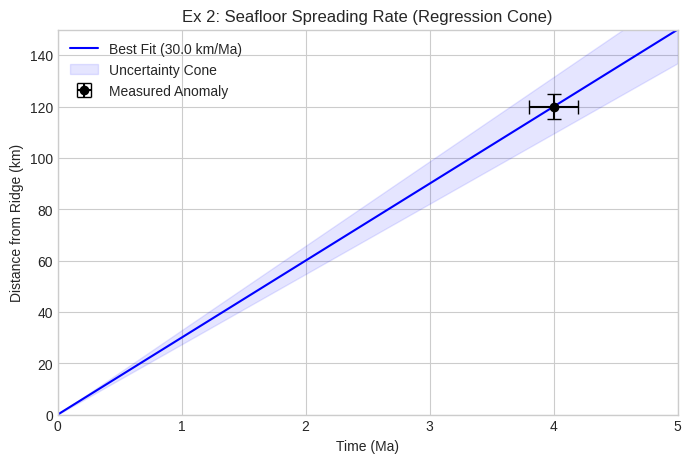

In [3]:
# --- Calculation ---
dist = 120.0      # km
d_dist = 5.0      # km

time = 4.0        # Ma
d_time = 0.2      # Ma

# 1. Calculate Value
velocity = dist / time

# 2. Propagate Uncertainty
frac_u_v = np.sqrt( (d_dist/dist)**2 + (d_time/time)**2 )
d_velocity = frac_u_v * velocity

print_result("Spreading Rate", velocity, d_velocity, "km/Ma")

# --- Visualization ---
plt.figure(figsize=(8, 5))

# Plot the single measurement point
plt.errorbar(time, dist, xerr=d_time, yerr=d_dist, fmt='o', color='black', capsize=5, label='Measured Anomaly')

# Generate lines for the "Cone of Uncertainty"
t_line = np.linspace(0, 5, 100)
v_max = (dist + d_dist) / (time - d_time)  # Max slope (Steepest)
v_min = (dist - d_dist) / (time + d_time)  # Min slope (Shallowest)

plt.plot(t_line, velocity * t_line, 'b-', label=f'Best Fit ({velocity:.1f} km/Ma)')
plt.fill_between(t_line, v_min * t_line, v_max * t_line, color='blue', alpha=0.1, label='Uncertainty Cone')

plt.xlabel('Time (Ma)')
plt.ylabel('Distance from Ridge (km)')
plt.title('Ex 2: Seafloor Spreading Rate (Regression Cone)')
plt.xlim(0, 5)
plt.ylim(0, 150)
plt.legend()
plt.show()

## Example 3: River Discharge (Dominant Error)
**Context:** Estimating flow rate ($Q$) in a channel.
**Formula:** $Q = w \cdot d \cdot v$

* **Width:** 10.0 $\pm$ 0.5 m (5% error)
* **Depth:** 2.0 $\pm$ 0.2 m (10% error)
* **Velocity:** 1.5 $\pm$ 0.3 m/s (20% error)

This example illustrates how the **"weakest link"** (velocity) dominates the final uncertainty.

--- Discharge ---
Value: 30.0000 m^3/s
Uncertainty: +/- 6.8739 m^3/s
Relative Uncertainty: 22.91%



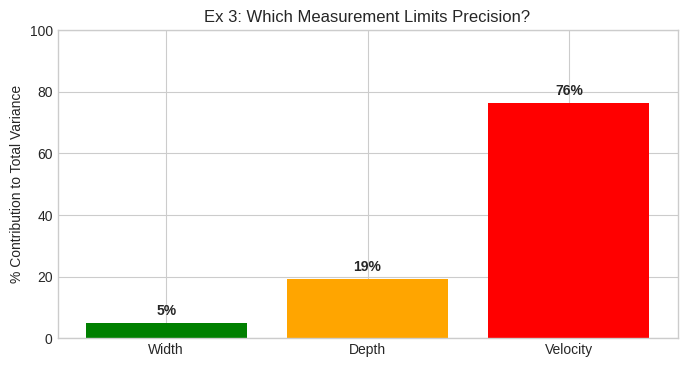

In [4]:
# --- Calculation ---
width, d_width = 10.0, 0.5
depth, d_depth = 2.0, 0.2
vel, d_vel = 1.5, 0.3

# 1. Calculate Value
discharge = width * depth * vel

# 2. Propagate Uncertainty
frac_u_Q = np.sqrt( (d_width/width)**2 + (d_depth/depth)**2 + (d_vel/vel)**2 )
d_discharge = frac_u_Q * discharge

print_result("Discharge", discharge, d_discharge, "m^3/s")

# --- Visualization ---
plt.figure(figsize=(8, 4))

# Calculate contribution to variance (squared relative error)
rel_errs = {'Width': d_width/width, 'Depth': d_depth/depth, 'Velocity': d_vel/vel}
names = list(rel_errs.keys())
squared_contrib = [v**2 for v in rel_errs.values()]
total_sq = sum(squared_contrib)
percent_contribution = [sq/total_sq * 100 for sq in squared_contrib]

# Bar Chart
bars = plt.bar(names, percent_contribution, color=['green', 'orange', 'red'])
plt.ylabel('% Contribution to Total Variance')
plt.title('Ex 3: Which Measurement Limits Precision?')
plt.ylim(0, 100)

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 2,
             f'{height:.0f}%', ha='center', va='bottom', fontweight='bold')

plt.show()

## Example 4: Geothermal Gradient (Two-Step Rule)
**Context:** Calculating temperature change with depth.
**Formula:** $G = (T_2 - T_1) / (z_2 - z_1)$

This requires mixing **Subtraction** (absolute error) and **Division** (relative error).

<>:37: SyntaxWarning: invalid escape sequence '\c'
<>:37: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipython-input-140793445.py:37: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel('Temperature ($^\circ$C)')


--- Geothermal Gradient ---
Value: 0.0500 C/m
Uncertainty: +/- 0.0008 C/m
Relative Uncertainty: 1.52%



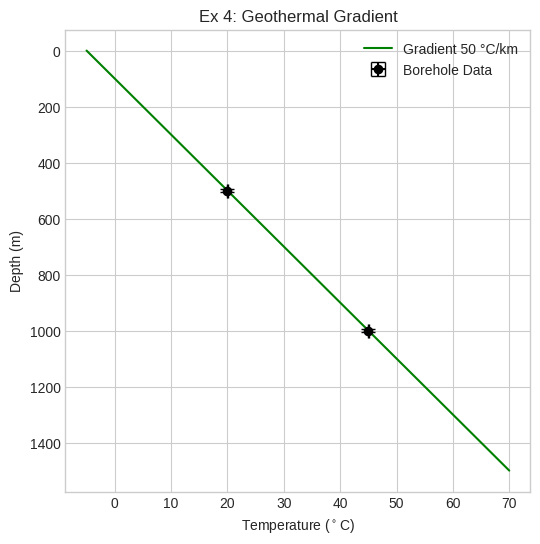

In [5]:
# --- Calculation ---
T2, d_T2 = 45.0, 0.1   # deg C
T1, d_T1 = 20.0, 0.1   # deg C
z2, d_z2 = 1000.0, 5.0 # meters
z1, d_z1 = 500.0, 5.0  # meters

# STEP 1: Subtraction (Absolute Uncertainties)
delta_T = T2 - T1
d_delta_T = np.sqrt(d_T2**2 + d_T1**2)

delta_z = z2 - z1
d_delta_z = np.sqrt(d_z2**2 + d_z1**2)

# STEP 2: Division (Relative Uncertainties)
gradient = delta_T / delta_z
frac_u_grad = np.sqrt( (d_delta_T/delta_T)**2 + (d_delta_z/delta_z)**2 )
d_gradient = frac_u_grad * gradient

print_result("Geothermal Gradient", gradient, d_gradient, "C/m")

# --- Visualization ---
plt.figure(figsize=(6, 6))

z_vals = np.array([z1, z2])
T_vals = np.array([T1, T2])

# Plot data points (Invert Y axis for depth)
plt.errorbar(T_vals, z_vals, xerr=0.1, yerr=5.0, fmt='o', color='black', capsize=5, label='Borehole Data')

# Plot Gradient Line
grad_line_z = np.linspace(0, 1500, 100)
grad_line_T = T1 + gradient * (grad_line_z - z1)

plt.plot(grad_line_T, grad_line_z, 'g-', label=f'Gradient {gradient*1000:.0f} °C/km')

plt.gca().invert_yaxis() # Depth increases downwards
plt.xlabel('Temperature ($^\circ$C)')
plt.ylabel('Depth (m)')
plt.title('Ex 4: Geothermal Gradient')
plt.legend()
plt.show()